# Importe as bibliotecas necessárias

In [1]:
'''
# Instalando as bibliotecas necessárias
%pip install -U pip setuptools wheel
%pip install pymongo
%pip install pandas
%pip install nltk
%pip install wordcloud
%pip install spacy
%pip install matplotlib
%pip install numpy==1.26.4
%pip install -U scikit-learn
%pip install unidecode
'''

'\n# Instalando as bibliotecas necessárias\n%pip install -U pip setuptools wheel\n%pip install pymongo\n%pip install pandas\n%pip install nltk\n%pip install wordcloud\n%pip install spacy\n%pip install matplotlib\n%pip install numpy==1.26.4\n%pip install -U scikit-learn\n%pip install unidecode\n'

# Importando as bibliotecas

In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('averaged_perceptron_tagger_eng', quiet=True)
from datetime import datetime
from db import connection_db as conndb
from db import filters
from utils import plot_graphs
from utils.text_treatment import TextTreatment
from utils.text_vectorization import TextVectorization
from dateutil.relativedelta import relativedelta
from utils.nuvem_palavras import NuvemPalavras

In [3]:
mongo_connection = conndb.MongoDBConnection(uri='mongodb://localhost:27017/', database_name='dadosVivamente',
                                            collection_name='dadosSemFiltros')
mongo_connection.connect()
collection = mongo_connection.collection

Conexão estabelecida com sucesso ao banco de dados.


In [4]:
collection_filters = filters.CollectionFilters(collection)
collection_filters.apply_pipeline1('dadosComFiltrosIniciais')
collection_filters.apply_pipeline2(7, 2, 'posts7anos2anos')
collection_filters.apply_pipeline3('postsComBDIAndInfos')
collection_filters.apply_pipeline4('postsComBDIAndInfosFiltroDataPosts')
data_inicio = datetime(2017, 12, 1)
data_fim = data_inicio - relativedelta(months=6)
collection_filters.apply_pipeline5('postsFiltradosPorData', data_inicio, data_fim)
collection_filters.quant_users_cat('suicida', '$eq', '3')
collection_filters.count_users_by_gender('suicida', '$eq', '3', 'M')
collection_filters.count_users_by_gender('suicida', '$eq', '3', 'F')
collection = collection_filters.collection

INFO:root:A coleção já existe: dadosComFiltrosIniciais
INFO:root:A coleção já existe: posts7anos2anos
INFO:root:A coleção já existe: postsComBDIAndInfos
INFO:root:A coleção já existe: postsComBDIAndInfosFiltroDataPosts
INFO:root:A coleção já existe: postsFiltradosPorData


Quantidade de Usuários: 58
Quantidade de usuários M: 11
Quantidade de usuários F: 47


In [5]:
# Filtrando documentos com o atributo maior que 3
filtro = {"nivel": {"$eq": 2}}
documentos = collection.find(filtro)

In [6]:
# Transformando os documentos em um DataFrame
df = pd.DataFrame(list(documentos))
df.head()

,_id,idade,sexo,id_usuario,nivel,pessimismo,tristeza,fracasso,prazer,culpa,...,quantAmigos,postMessage,postStory,postCreated_time,diaDaSemana,hora,minutos,diaDoMes,mes,ano
0,59c325925fef19001e03ae70,33,F,1358116567556711,2.0,1,1,0,0,1,...,1099,❤❤❤,Elisa Lacal shared a memory.,2017-09-20 13:43:35,Quarta-feira,13,43,20,9,2017
1,59c325925fef19001e03ae71,33,F,1358116567556711,2.0,1,1,0,0,1,...,1099,NaN,Elisa Lacal shared Colégio Master :: Oficial :...,2017-09-16 10:23:09,Sábado,10,23,16,9,2017
2,59c325925fef19001e03ae72,33,F,1358116567556711,2.0,1,1,0,0,1,...,1099,NaN,Ellen Bueno added 4 new photos — with Marcus A...,2017-09-10 22:09:50,Domingo,22,9,10,9,2017
3,59c325925fef19001e03ae73,33,F,1358116567556711,2.0,1,1,0,0,1,...,1099,#pescadores_br #caceres #riosepotuba #fishing,Murilo Alves Gonçalves Dos Santos is with Marc...,2017-09-10 20:05:32,Domingo,20,5,10,9,2017
4,59c325925fef19001e03ae74,33,F,1358116567556711,2.0,1,1,0,0,1,...,1099,Parabéns Giulia!! O tão esperado #DiaDaAlta ch...,REDEORTO Várzea Grande is feeling blissful wit...,2017-09-05 20:05:46,Terça-feira,20,5,5,9,2017


In [7]:
print(df.dtypes)
# Lista de colunas que precisam ser convertidas
colunas_para_converter = [
    'pessimismo', 'tristeza', 'fracasso', 'prazer', 'culpa', 'punicao', 'estima',
    'critica', 'suicida', 'choro', 'agitacao', 'interesse', 'indecisao',
    'desvalorizacao', 'energia', 'sono', 'irritabilidade', 'apetite',
    'concentracao', 'fadiga', 'int_sexo', 'quantAmigos'
]

df[colunas_para_converter] = df[colunas_para_converter].astype('int64')

_id                         object
idade                        int64
sexo                        object
id_usuario                  object
nivel                      float64
pessimismo                  object
tristeza                    object
fracasso                    object
prazer                      object
culpa                       object
punicao                     object
estima                      object
critica                     object
suicida                     object
choro                       object
agitacao                    object
interesse                   object
indecisao                   object
desvalorizacao              object
energia                     object
sono                        object
irritabilidade              object
apetite                     object
concentracao                object
fadiga                      object
int_sexo                    object
quantAmigos                 object
postMessage                 object
postStory           

In [8]:
# Salvar o DataFrame em um arquivo CSV
df.to_csv('dados/com_filtros_datas/6meses/so_suicida_6_meses.csv', index=False)

In [9]:
# Agrupar por usuário, mês e ano
posts_grouped = df.groupby(['id_usuario', 'mes', 'ano']).size().reset_index(name='quantidade')

# Adicionar coluna com o período e converter para datetime
posts_grouped['periodo'] = pd.to_datetime(posts_grouped['mes'].astype(str) + '/' + posts_grouped['ano'].astype(str),
                                          format='%m/%Y')

# Deve retornar 0 se a conversão foi bem-sucedida.
print(posts_grouped['periodo'].isnull().sum())

posts_grouped.dtypes

0


id_usuario            object
mes                    int64
ano                    int64
quantidade             int64
periodo       datetime64[ns]
dtype: object

# Plotar quantidade de posts por usuário

In [10]:
# plot_graphs.PlotGraphs().plot_posts_per_user(posts_grouped, 'dados/com_filtros_datas/6meses/graficos')

# Efentuando a limpeza dos dados

In [11]:
text_treatment = TextTreatment()
df['postMessageLimpo'] = df['postMessage'].fillna('').apply(
    lambda text: text_treatment.preprocessamento_texto(text) if text else '')

In [12]:
# Exibir apenas as colunas postMessage e postMessageLimpo
df[['postMessage', 'postMessageLimpo']].head()

,postMessage,postMessageLimpo
0,❤❤❤,
1,NaN,
2,NaN,
3,#pescadores_br #caceres #riosepotuba #fishing,pescadores caceres riosepotuba fishing
4,Parabéns Giulia!! O tão esperado #DiaDaAlta ch...,parabéns tão esperado diadaalta chegou unidade...


In [13]:
# Carregar stopwords em português para os TF-IDF e Bag of Words
stop_words = stopwords.words('portuguese')

In [14]:
text_vectorizer = TextVectorization(df, stop_words)
# Vetorização TF-IDF
resultados_tfidf = text_vectorizer.tfidf_vectorization(
    'dados/com_filtros_datas/6meses/so_suicida_resultados_tfidf_unigramas.csv', 0.60, 2,
    (1, 1))

# Vetorização Bag of Words
resultados_bow = text_vectorizer.bag_of_words_vectorization(
    'dados/com_filtros_datas/6meses/so_suicida_resultados_bow_unigramas.csv',
    0.85, 5, (1, 1))

            id_usuario       palavra     score
0     1358116567556711         lacal  0.049056
1     1358116567556711  vivasorrindo  0.035634
2     1358116567556711      parabéns  0.025783
3     1358116567556711        várzea  0.022315
4     1358116567556711           abo  0.020949
...                ...           ...       ...
1435   336339230103012        semana  0.009901
1436   336339230103012       entende  0.009901
1437   336339230103012          leve  0.009901
1438   336339230103012       difícil  0.009231
1439   336339230103012          dade  0.008167

[1440 rows x 3 columns]
            id_usuario       palavra  contagem
0     1358116567556711          deus        12
1     1358116567556711          vida        10
2     1358116567556711      parabéns         9
3     1358116567556711         lacal         9
4     1358116567556711  vivasorrindo         8
...                ...           ...       ...
1435   336339230103012        espero         1
1436   336339230103012          faç

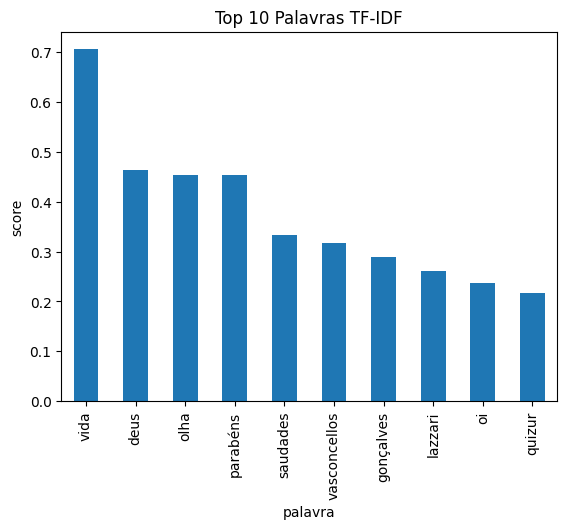

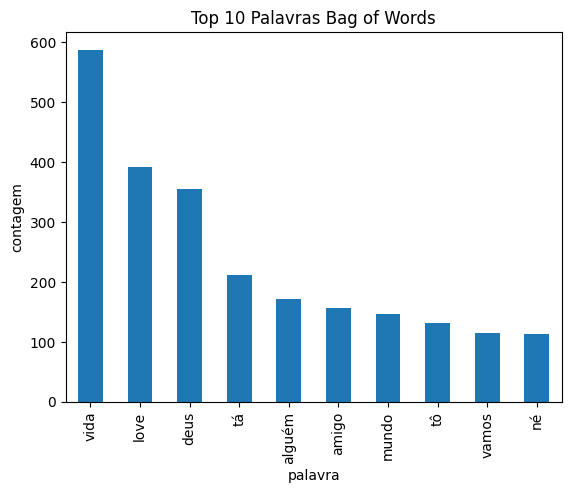

In [15]:
text_vectorizer.plot_top_words(resultados_tfidf, column='score', title='Top 10 Palavras TF-IDF')
text_vectorizer.plot_top_words(resultados_bow, column='contagem', title='Top 10 Palavras Bag of Words')

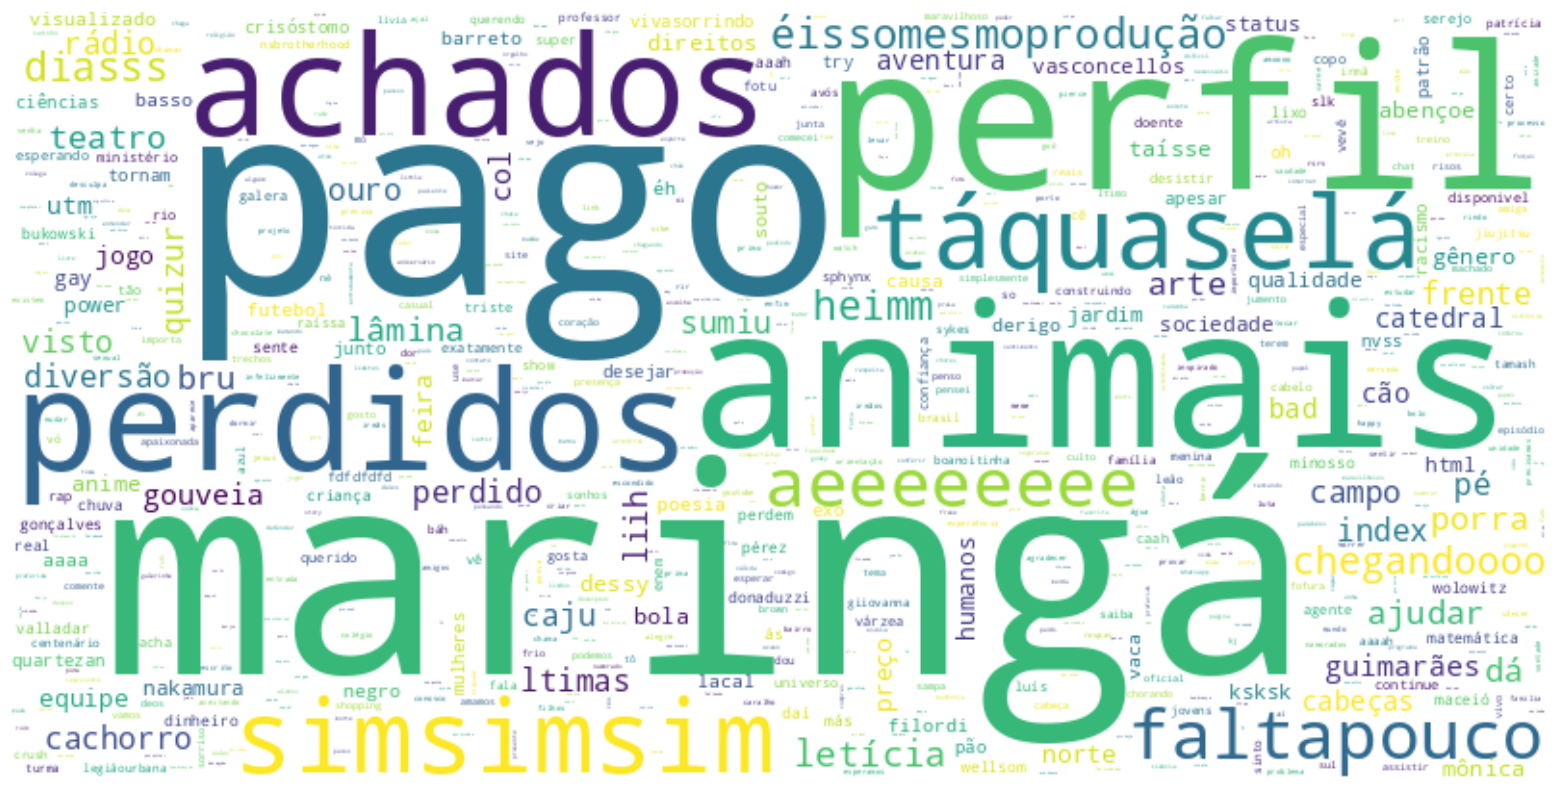

In [16]:
frequencias_bow = dict(zip(resultados_bow['palavra'], resultados_bow['contagem']))

# Gerar e plotar a nuvem de palavras
NuvemPalavras.plot_nuvem_palavras(frequencias_bow)

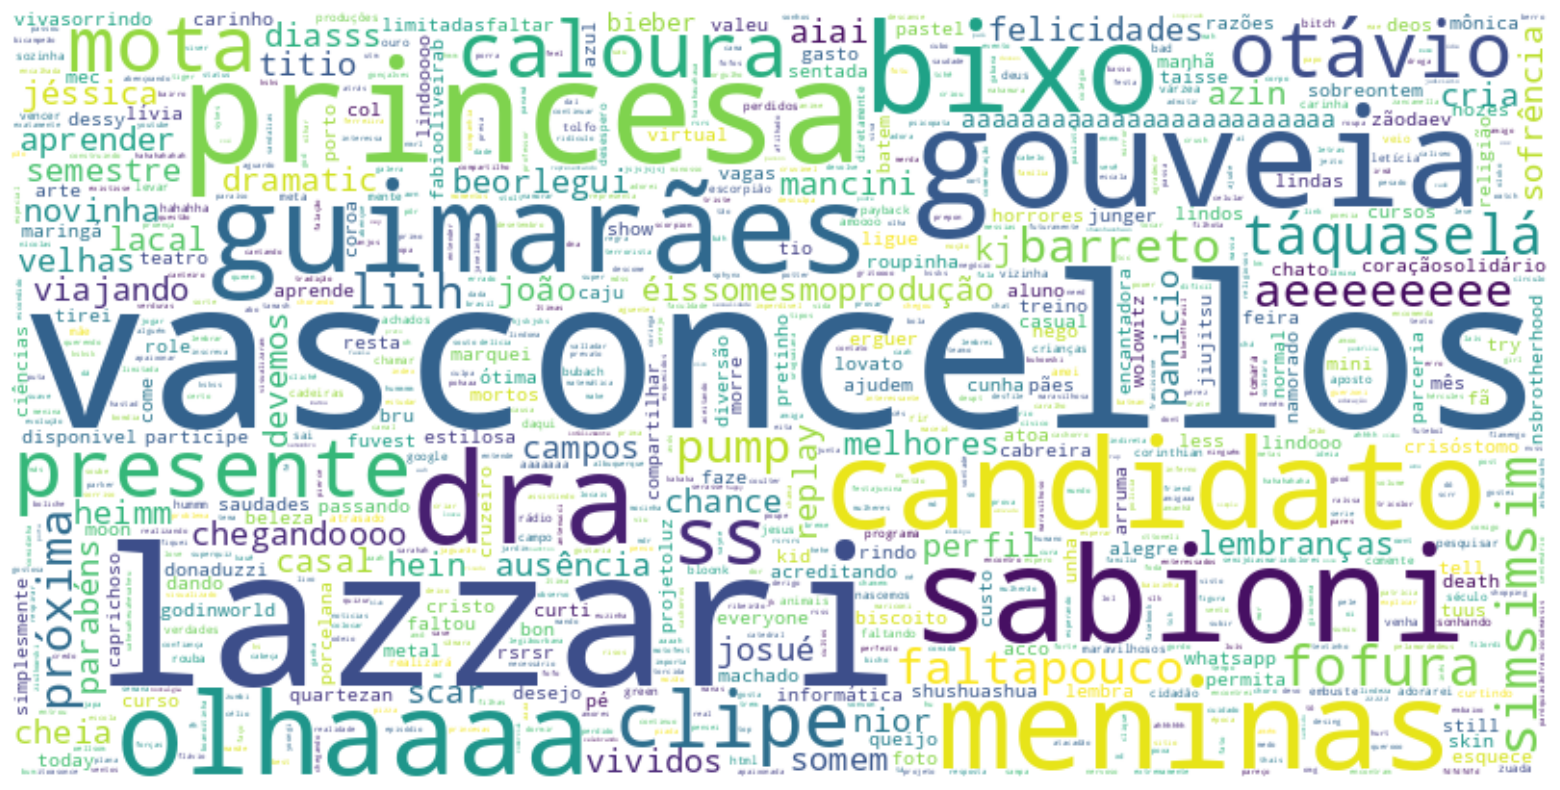

In [17]:
frequencias_tfidf = dict(zip(resultados_tfidf['palavra'], resultados_tfidf['score']))

# Gerar e plotar a nuvem de palavras
NuvemPalavras.plot_nuvem_palavras(frequencias_tfidf)